In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset

PlayerStats = pd.read_csv('player_data.csv')
PlayerStats

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0.0,1,0.0,0.0,NaN,2023
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81.0,244,337.0,289.0,53.8,2023
2,2,Noel Acciari,31.0,STL,C,54,10,8,18,-6,...,74,13.5,787,14:35,55.0,168,275.0,239.0,53.5,2023
3,2,Noel Acciari,31.0,TOR,C,23,4,1,5,2,...,28,14.3,315,13:41,26.0,76,62.0,50.0,55.4,2023
4,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38.0,19,0.0,0.0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,875,Greg Zanon,29.0,MIN,D,81,2,13,15,-10,...,59,3.4,1812,22:22,196.0,183,0.0,1.0,0.0,2010
14628,876,Henrik Zetterberg,29.0,DET,C,74,23,47,70,12,...,309,7.4,1485,20:04,34.0,44,536.0,543.0,49.7,2010
14629,877,Vladimir Zharkov,22.0,NJD,RW,40,0,10,10,2,...,54,0.0,458,11:26,6.0,22,1.0,3.0,25.0,2010
14630,878,Marek Židlický,32.0,MIN,D,78,6,37,43,-16,...,116,5.2,1885,24:10,128.0,80,0.0,0.0,NaN,2010


In [4]:
PlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14632 entries, 0 to 14631
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14632 non-null  int64  
 1   Player  14632 non-null  object 
 2   Age     14630 non-null  float64
 3   Tm      14632 non-null  object 
 4   Pos     14632 non-null  object 
 5   GP      14632 non-null  int64  
 6   G       14632 non-null  int64  
 7   A       14632 non-null  int64  
 8   PTS     14632 non-null  int64  
 9   +/-     14632 non-null  int64  
 10  PIM     14632 non-null  int64  
 11  PS      14632 non-null  float64
 12  EV      14632 non-null  int64  
 13  PP      14632 non-null  int64  
 14  SH      14632 non-null  int64  
 15  GW      14632 non-null  int64  
 16  EV.1    14632 non-null  int64  
 17  PP.1    14632 non-null  int64  
 18  SH.1    14632 non-null  int64  
 19  S       14632 non-null  int64  
 20  S%      14243 non-null  float64
 21  TOI     14632 non-null  int64  
 22

In [5]:
PlayerStats.groupby('Player')['year'].size().sort_values(ascending=False)

Player
Derick Brassard          23
Nate Thompson            21
Luke Schenn              20
Ian Cole                 19
Vladislav Namestnikov    19
                         ..
Sean Day                  1
Sean Farrell              1
Jamie Doornbosch          1
Matt Anderson             1
Carter Bancks             1
Name: year, Length: 2602, dtype: int64

We only want to keep stats for total year, so when we have cases where a player changes team during the year, we only want to keep the TOT statline

In [6]:
# intialize empty list to store rows
rows_to_keep = []

# Create set to keep track of 'Player' values for each year
encountered_players = {}

# Iterate through dataframe
for index, row in PlayerStats.iterrows():
    player = row['Player']
    team = row['Tm']
    year = row['year']

    # Check if year has been encountered before
    if year not in encountered_players:
        encountered_players[year] = set()
    if player not in encountered_players[year]:
        # If first instance encountering player in year, add row
        rows_to_keep.append(row)
        encountered_players[year].add(player)
    elif team == "TOT":
        # if has 'TOT' value in Tm, insert this value
        for i, stored_row in enumerate(rows_to_keep):
            if stored_row['Player'] == player and stored_row['year'] == year:
                rows_to_keep[i] = row

PlayerStats2 = pd.DataFrame(rows_to_keep)
PlayerStats2.reset_index(inplace = True, drop = True)

PlayerStats2

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0.0,1,0.0,0.0,NaN,2023
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81.0,244,337.0,289.0,53.8,2023
2,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38.0,19,0.0,0.0,NaN,2023
3,4,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,21,4.8,184,10:51,13.0,23,0.0,0.0,NaN,2023
4,5,Andrew Agozzino,32.0,SJS,LW,4,1,2,3,-1,...,9,11.1,65,16:22,4.0,12,1.0,0.0,100.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12594,875,Greg Zanon,29.0,MIN,D,81,2,13,15,-10,...,59,3.4,1812,22:22,196.0,183,0.0,1.0,0.0,2010
12595,876,Henrik Zetterberg,29.0,DET,C,74,23,47,70,12,...,309,7.4,1485,20:04,34.0,44,536.0,543.0,49.7,2010
12596,877,Vladimir Zharkov,22.0,NJD,RW,40,0,10,10,2,...,54,0.0,458,11:26,6.0,22,1.0,3.0,25.0,2010
12597,878,Marek Židlický,32.0,MIN,D,78,6,37,43,-16,...,116,5.2,1885,24:10,128.0,80,0.0,0.0,NaN,2010


In [7]:
PlayerStats2['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010])

In [8]:
PlayerStats2.groupby('Player')['year'].size().sort_values(ascending=False)

Player
Erik Johnson              14
Kris Letang               14
Patrice Bergeron          14
Patric Hörnqvist          14
Wayne Simmonds            14
                          ..
Glen Metropolit            1
Ole-Kristian Tollefsen     1
Grant Hutton               1
Callahan Burke             1
Joonas Nättinen            1
Name: year, Length: 2602, dtype: int64

In [9]:
PlayerStats['Player'].nunique()

2602

In [10]:
PlayerStats2['Player'].nunique()

2602

In [11]:
# exporting non-dup df to csv

PlayerStats2.to_csv('player_data_non_duplicate', index=False)

## Data Preprocessing

In [66]:
PlayerStats = pd.read_csv('player_data_non_duplicate')

PlayerStats

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0.0,1,0.0,0.0,NaN,2023
1,2,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,102,13.7,1102,14:19,81.0,244,337.0,289.0,53.8,2023
2,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38.0,19,0.0,0.0,NaN,2023
3,4,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,21,4.8,184,10:51,13.0,23,0.0,0.0,NaN,2023
4,5,Andrew Agozzino,32.0,SJS,LW,4,1,2,3,-1,...,9,11.1,65,16:22,4.0,12,1.0,0.0,100.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12594,875,Greg Zanon,29.0,MIN,D,81,2,13,15,-10,...,59,3.4,1812,22:22,196.0,183,0.0,1.0,0.0,2010
12595,876,Henrik Zetterberg,29.0,DET,C,74,23,47,70,12,...,309,7.4,1485,20:04,34.0,44,536.0,543.0,49.7,2010
12596,877,Vladimir Zharkov,22.0,NJD,RW,40,0,10,10,2,...,54,0.0,458,11:26,6.0,22,1.0,3.0,25.0,2010
12597,878,Marek Židlický,32.0,MIN,D,78,6,37,43,-16,...,116,5.2,1885,24:10,128.0,80,0.0,0.0,NaN,2010


In [67]:
PlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12599 entries, 0 to 12598
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      12599 non-null  int64  
 1   Player  12599 non-null  object 
 2   Age     12597 non-null  float64
 3   Tm      12599 non-null  object 
 4   Pos     12599 non-null  object 
 5   GP      12599 non-null  int64  
 6   G       12599 non-null  int64  
 7   A       12599 non-null  int64  
 8   PTS     12599 non-null  int64  
 9   +/-     12599 non-null  int64  
 10  PIM     12599 non-null  int64  
 11  PS      12599 non-null  float64
 12  EV      12599 non-null  int64  
 13  PP      12599 non-null  int64  
 14  SH      12599 non-null  int64  
 15  GW      12599 non-null  int64  
 16  EV.1    12599 non-null  int64  
 17  PP.1    12599 non-null  int64  
 18  SH.1    12599 non-null  int64  
 19  S       12599 non-null  int64  
 20  S%      12245 non-null  float64
 21  TOI     12599 non-null  int64  
 22

In [68]:
# how many null values

PlayerStats.iloc[:, :15].isnull().sum()

Rk        0
Player    0
Age       2
Tm        0
Pos       0
GP        0
G         0
A         0
PTS       0
+/-       0
PIM       0
PS        0
EV        0
PP        0
SH        0
dtype: int64

In [69]:
PlayerStats.iloc[:, 15:].isnull().sum()

GW         0
EV.1       0
PP.1       0
SH.1       0
S          0
S%       354
TOI        0
ATOI       0
BLK        7
HIT        0
FOW        7
FOL        7
FO%     4772
year       0
dtype: int64

In [70]:
PlayerStats.describe()

,Rk,Age,GP,G,A,PTS,+/-,PIM,PS,EV,...,SH.1,S,S%,TOI,BLK,HIT,FOW,FOL,FO%,year
count,12599.000000,12597.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,...,12599.000000,12599.000000,12245.000000,12599.000000,12592.000000,12599.000000,12592.000000,12592.000000,7827.000000,12599.000000
mean,451.523454,26.398349,46.971188,7.395111,12.528772,19.923883,-0.379554,25.159695,2.390214,5.615366,...,0.219779,79.794904,7.792389,775.678546,36.800985,59.210731,76.454177,76.453224,42.336080,2016.609096
std,261.176655,4.375542,28.153930,8.764425,13.021802,20.563116,9.891389,26.251505,2.740358,6.345431,...,0.559553,69.284924,7.715673,557.693812,38.998043,54.233278,171.890863,161.762389,20.569166,4.060131
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,-47.000000,0.000000,-1.900000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,226.000000,23.000000,19.000000,1.000000,2.000000,3.000000,-5.000000,6.000000,0.200000,1.000000,...,0.000000,19.000000,2.900000,226.000000,8.000000,16.000000,0.000000,0.000000,33.300000,2013.000000
50%,451.000000,26.000000,52.000000,4.000000,9.000000,13.000000,-1.000000,18.000000,1.500000,3.000000,...,0.000000,66.000000,7.100000,774.000000,24.000000,46.000000,2.000000,3.000000,45.800000,2017.000000
75%,676.000000,29.000000,73.000000,11.000000,19.000000,31.000000,4.000000,36.000000,3.900000,9.000000,...,0.000000,123.000000,11.300000,1233.000000,50.000000,87.000000,33.250000,41.000000,51.600000,2020.000000
max,1004.000000,48.000000,85.000000,64.000000,89.000000,153.000000,64.000000,307.000000,18.200000,48.000000,...,6.000000,407.000000,100.000000,2412.000000,283.000000,382.000000,1273.000000,935.000000,100.000000,2023.000000


### Imputing S%

In [71]:
PlayerStats[PlayerStats['S%'].isnull()]

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
36,38,Cole Bardreau,29.0,NYI,F,1,0,0,0,0,...,0,NaN,7,6:37,0.0,2,0.0,0.0,NaN,2023
50,52,Owen Beck,18.0,MTL,C,1,0,0,0,-1,...,0,NaN,10,9:48,1.0,0,1.0,2.0,33.3,2023
62,64,Tyler Benson,24.0,EDM,LW,2,0,0,0,0,...,0,NaN,13,6:17,0.0,2,0.0,0.0,NaN,2023
68,70,William Bitten,24.0,STL,C,4,0,1,1,1,...,0,NaN,27,6:39,0.0,10,0.0,0.0,NaN,2023
89,91,Henrik Borgström,25.0,WSH,C,1,0,0,0,0,...,0,NaN,8,8:10,0.0,0,0.0,0.0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462,743,Martin St. Pierre,26.0,OTT,C,3,0,0,0,-2,...,0,NaN,29,9:37,0.0,2,9.0,11.0,45.0,2010
12548,829,Tim Wallace,25.0,PIT,RW,1,0,0,0,0,...,0,NaN,6,5:50,0.0,3,0.0,0.0,NaN,2010
12551,832,Ben Walter,25.0,NJD,C,2,0,0,0,0,...,0,NaN,12,5:48,0.0,0,2.0,4.0,33.3,2010
12575,856,Clay Wilson,26.0,FLA,D,2,0,0,0,-5,...,0,NaN,22,11:07,1.0,4,0.0,0.0,NaN,2010


We can impute the missing values using a variety of techniques. If the player has appeared in the dataset before, we can use their previous S%. We can also impute using more simplistic methods such as mean, median, or mode.<br>We can also impute the values through machine learning techniques such as KNN or regression.

### Imputing FO%

In [72]:
PlayerStats[PlayerStats['FO%'].isnull()]

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
0,1,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,2,0.0,18,8:59,0.0,1,0.0,0.0,NaN,2023
2,3,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,77,3.9,999,16:07,38.0,19,0.0,0.0,NaN,2023
3,4,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,21,4.8,184,10:51,13.0,23,0.0,0.0,NaN,2023
7,9,Alexander Alexeyev,23.0,WSH,D,32,0,5,5,-2,...,28,0.0,527,16:27,48.0,33,0.0,0.0,NaN,2023
8,10,Frédéric Allard,25.0,MTL,D,3,0,0,0,2,...,6,0.0,42,13:51,2.0,0,0.0,0.0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12582,863,James Wisniewski,25.0,ANA,D,69,3,27,30,-5,...,146,2.1,1680,24:21,102.0,129,0.0,0.0,NaN,2010
12585,866,Jeff Woywitka,26.0,DAL,D,36,0,3,3,-6,...,44,0.0,508,14:06,42.0,28,0.0,0.0,NaN,2010
12586,867,Andy Wozniewski,29.0,BOS,D,2,0,0,0,0,...,1,0.0,19,9:17,1.0,0,0.0,0.0,NaN,2010
12589,870,Keith Yandle,23.0,PHX,D,82,12,29,41,16,...,145,8.3,1659,20:14,81.0,36,0.0,0.0,NaN,2010


We can use imputation methods discussed earlier for S%

In [73]:
PlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12599 entries, 0 to 12598
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      12599 non-null  int64  
 1   Player  12599 non-null  object 
 2   Age     12597 non-null  float64
 3   Tm      12599 non-null  object 
 4   Pos     12599 non-null  object 
 5   GP      12599 non-null  int64  
 6   G       12599 non-null  int64  
 7   A       12599 non-null  int64  
 8   PTS     12599 non-null  int64  
 9   +/-     12599 non-null  int64  
 10  PIM     12599 non-null  int64  
 11  PS      12599 non-null  float64
 12  EV      12599 non-null  int64  
 13  PP      12599 non-null  int64  
 14  SH      12599 non-null  int64  
 15  GW      12599 non-null  int64  
 16  EV.1    12599 non-null  int64  
 17  PP.1    12599 non-null  int64  
 18  SH.1    12599 non-null  int64  
 19  S       12599 non-null  int64  
 20  S%      12245 non-null  float64
 21  TOI     12599 non-null  int64  
 22

### Age

In [74]:
PlayerStats[PlayerStats['Age'].isnull()]

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
197,199,Elliot Desnoyers,NaN,PHI,F,4,0,0,0,-2,...,3,0.0,53,13:22,4.0,9,8.0,14.0,36.4,2023
534,536,Jake Livingstone,NaN,NSH,D,5,0,1,1,-2,...,3,0.0,77,15:27,11.0,6,0.0,0.0,NaN,2023


In [75]:
PlayerStats[PlayerStats['Player'] == 'Elliot Desnoyers']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
197,199,Elliot Desnoyers,NaN,PHI,F,4,0,0,0,-2,...,3,0.0,53,13:22,4.0,9,8.0,14.0,36.4,2023


In [76]:
PlayerStats[PlayerStats['Player'] == 'Jake Livingstone']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
534,536,Jake Livingstone,NaN,NSH,D,5,0,1,1,-2,...,3,0.0,77,15:27,11.0,6,0.0,0.0,NaN,2023


Since we don't have more information on these players in this dataset, we google the player's age and fill in the missing values

In [77]:
PlayerStats.loc[PlayerStats['Player'] == 'Elliot Desnoyers', 'Age'] = 21
PlayerStats.loc[PlayerStats['Player'] == 'Jake Livingstone', 'Age'] = 24

print(PlayerStats[PlayerStats['Player'] == 'Elliot Desnoyers'])
print(PlayerStats[PlayerStats['Player'] == 'Jake Livingstone'])

      Rk            Player   Age   Tm Pos  GP  G  A  PTS  +/-  ...  S   S%  \
197  199  Elliot Desnoyers  21.0  PHI   F   4  0  0    0   -2  ...  3  0.0   

     TOI   ATOI  BLK  HIT  FOW   FOL   FO%  year  
197   53  13:22  4.0    9  8.0  14.0  36.4  2023  

[1 rows x 29 columns]
      Rk            Player   Age   Tm Pos  GP  G  A  PTS  +/-  ...  S   S%  \
534  536  Jake Livingstone  24.0  NSH   D   5  0  1    1   -2  ...  3  0.0   

     TOI   ATOI   BLK  HIT  FOW  FOL  FO%  year  
534   77  15:27  11.0    6  0.0  0.0  NaN  2023  

[1 rows x 29 columns]


In [78]:
PlayerStats['Age'].isnull().sum()

0

### Team

In [79]:
PlayerStats['Tm'].value_counts()

TOT    992
VAN    406
NJD    405
CBJ    405
OTT    403
BOS    398
EDM    392
COL    390
MIN    389
NYI    389
BUF    387
MTL    386
NSH    383
ANA    382
PHI    382
DET    381
CGY    381
PIT    380
CHI    373
STL    372
SJS    372
FLA    371
TOR    370
WSH    368
TBL    364
DAL    363
LAK    360
CAR    354
NYR    352
WPG    327
ARI    242
VEG    160
PHX    130
ATL     46
SEA     44
Name: Tm, dtype: int64

Team looks good

### Position

In [80]:
PlayerStats['Pos'].value_counts()

D     4350
C     3938
LW    2168
RW    1986
F      144
W       13
Name: Pos, dtype: int64

In [81]:
# low amount of W position

PlayerStats[PlayerStats['Pos'] == 'W']

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
97,99,Jesper Bratt,24.0,NJD,W,82,32,41,73,14,...,212,15.1,1424,17:22,23.0,24,0.0,0.0,NaN,2023
944,946,Fabian Zetterlund,23.0,TOT,W,67,6,17,23,-6,...,118,5.1,888,13:15,20.0,53,7.0,10.0,41.2,2023
1049,101,Jesper Bratt,23.0,NJD,W,76,26,47,73,0,...,197,13.2,1325,17:26,30.0,26,0.0,3.0,0.0,2022
1907,959,Kristian Vesalainen,22.0,WPG,W,53,2,1,3,-8,...,43,4.7,460,8:40,14.0,72,0.0,1.0,0.0,2022
1947,999,Fabian Zetterlund,22.0,NJD,W,14,3,5,8,5,...,36,8.3,187,13:21,7.0,16,2.0,1.0,66.7,2022
2030,79,Joachim Blichfeld,22.0,SJS,W,5,1,0,1,-2,...,3,33.3,43,8:41,2.0,2,0.0,0.0,NaN,2021
2048,97,Jesper Bratt,22.0,NJD,W,46,7,23,30,4,...,101,6.9,740,16:05,18.0,31,3.0,6.0,33.3,2021
2817,866,Kristian Vesalainen,21.0,WPG,W,12,0,1,1,0,...,5,0.0,104,8:41,5.0,8,0.0,0.0,NaN,2021
2934,70,Joachim Blichfeld,21.0,SJS,W,3,0,0,0,-2,...,3,0.0,38,12:46,4.0,3,0.0,0.0,NaN,2020
2954,90,Jesper Bratt,21.0,NJD,W,60,16,16,32,-6,...,101,15.8,839,13:59,22.0,29,3.0,10.0,23.1,2020


We see the same 3 players whose position is 'W'. We can classify them into a RW or LW due to the low amount of 'W'

Are LW and RW very different?

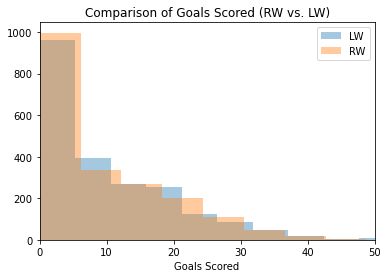

In [82]:
plt.hist(PlayerStats[PlayerStats['Pos'] == 'LW']['G'], label='LW', alpha = 0.4)
plt.hist(PlayerStats[PlayerStats['Pos'] == 'RW']['G'], label='RW', alpha = 0.4)
plt.title("Comparison of Goals Scored (RW vs. LW)")
plt.xlabel("Goals Scored")
plt.xlim(0, 50)
plt.legend()
plt.show()

The amount of goals scored between left and right wings look similar. We can run a T test on the mean goals scored between each positions to determine if there is statistical significance

In [83]:
from scipy.stats import ttest_ind

avg_goals_RW = PlayerStats[PlayerStats['Pos'] == 'RW']['G'].mean()
avg_goals_LW = PlayerStats[PlayerStats['Pos'] == 'LW']['G'].mean()

amount_of_LW = len(PlayerStats[PlayerStats['Pos'] == 'LW'])
amount_of_RW = len(PlayerStats[PlayerStats['Pos'] == 'RW'])

print(f'Amount of LW: {amount_of_LW}')
print(f'Amount of RW: {amount_of_RW}')

print(f'RW Goals: {avg_goals_RW}')
print(f'LW Goals: {avg_goals_LW}')

Amount of LW: 2168
Amount of RW: 1986
RW Goals: 9.642497482376637
LW Goals: 9.77629151291513


In [84]:
# Extract the goal data for RW and LW players
goals_RW = PlayerStats[PlayerStats['Pos'] == 'RW']['G']
goals_LW = PlayerStats[PlayerStats['Pos'] == 'LW']['G']

# Perform the t-test
t_stat, pval = ttest_ind(goals_RW, goals_LW)

# Print the p-value
print("P-value:", pval)

P-value: 0.6643065980374242


As we can see, the statistical difference between goals scored by wings is not significant. This may come into impact when we group with the contract data: Is there a difference in salary between LW and RW positions?

In [85]:
# Imputed based on google searches

# Update 'Pos' column based on player names
PlayerStats.loc[PlayerStats['Player'] == 'Jesper Bratt', 'Pos'] = 'RW'
PlayerStats.loc[PlayerStats['Player'] == 'Fabian Zetterlund', 'Pos'] = 'RW'
PlayerStats.loc[PlayerStats['Player'] == 'Kristian Vesalainen', 'Pos'] = 'LW'
PlayerStats.loc[PlayerStats['Player'] == 'Joachim Blichfeld', 'Pos'] = 'LW'

# Check the updated 'Pos' column
PlayerStats['Pos'].value_counts()

D     4350
C     3938
LW    2173
RW    1994
F      144
Name: Pos, dtype: int64

### GP

In [86]:
PlayerStats['GP'].dtype

dtype('int64')

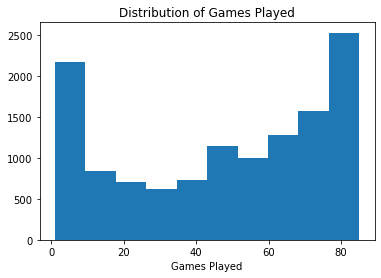

In [87]:
plt.hist(PlayerStats['GP'])
plt.xlabel('Games Played')
plt.title('Distribution of Games Played')
plt.show()

In [88]:
PlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12599 entries, 0 to 12598
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      12599 non-null  int64  
 1   Player  12599 non-null  object 
 2   Age     12599 non-null  float64
 3   Tm      12599 non-null  object 
 4   Pos     12599 non-null  object 
 5   GP      12599 non-null  int64  
 6   G       12599 non-null  int64  
 7   A       12599 non-null  int64  
 8   PTS     12599 non-null  int64  
 9   +/-     12599 non-null  int64  
 10  PIM     12599 non-null  int64  
 11  PS      12599 non-null  float64
 12  EV      12599 non-null  int64  
 13  PP      12599 non-null  int64  
 14  SH      12599 non-null  int64  
 15  GW      12599 non-null  int64  
 16  EV.1    12599 non-null  int64  
 17  PP.1    12599 non-null  int64  
 18  SH.1    12599 non-null  int64  
 19  S       12599 non-null  int64  
 20  S%      12245 non-null  float64
 21  TOI     12599 non-null  int64  
 22

### Goals

Text(0.5, 1.0, 'Dist of Goals Scored')

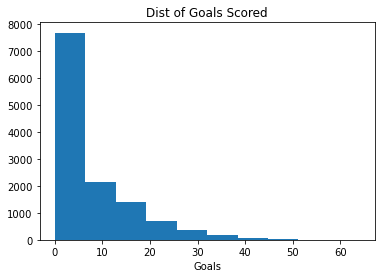

In [89]:
plt.hist(PlayerStats['G'])
plt.xlabel("Goals")
plt.title("Dist of Goals Scored")

Most players don't score few players score a lot

In [90]:
# 95th percentile of goal scorers

top_goals = np.percentile(PlayerStats['G'], 95)
top_goals

26.0

Players in the 95th percentile of goal scorers, score at least 26 goals. Let's separate them into their own dataframe

In [91]:
TopScorers = PlayerStats[PlayerStats['G'] >= top_goals]
TopScorers

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,year
5,6,Sebastian Aho,25.0,CAR,F,75,36,31,67,8,...,218,16.5,1462,19:30,21.0,59,531.0,503.0,51.4,2023
23,25,Viktor Arvidsson,29.0,LAK,LW,77,26,33,59,-4,...,228,11.4,1316,17:06,48.0,25,27.0,40.0,40.3,2023
57,59,Jamie Benn,33.0,DAL,LW,82,33,45,78,23,...,190,17.4,1294,15:47,38.0,97,520.0,345.0,60.1,2023
63,65,Patrice Bergeron,37.0,BOS,C,78,27,31,58,35,...,249,10.8,1357,17:24,54.0,66,1043.0,663.0,61.1,2023
83,85,Matt Boldy,21.0,MIN,LW,81,31,32,63,1,...,255,12.2,1498,18:30,26.0,65,77.0,64.0,54.6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12477,758,Lee Stempniak,26.0,TOT,RW,80,28,20,48,0,...,212,13.2,1386,17:19,25.0,87,17.0,22.0,43.6,2010
12478,759,Chris Stewart,22.0,COL,RW,77,28,36,64,4,...,221,12.7,1286,16:42,11.0,100,3.0,5.0,37.5,2010
12534,815,Thomas Vanek,26.0,BUF,LW,71,28,25,53,9,...,182,15.4,1190,16:46,15.0,45,0.0,7.0,0.0,2010
12536,817,Antoine Vermette,27.0,CBJ,C,82,27,38,65,2,...,156,17.3,1652,20:09,40.0,91,852.0,721.0,54.2,2010


In [92]:
# Positions which score the most

TopScorers['Pos'].value_counts()

C     291
LW    186
RW    171
F       4
D       3
Name: Pos, dtype: int64